## Assignment 3
## Oktaviani // PYTN-KS16-02

---

### Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
- The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

- Input variables:

### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- 6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- 7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular', 'telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
### social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)
### Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## IMPORT LIBRARY

In [20]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import graphviz

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
df = pd.read_csv('datasets/bank.csv', sep=';')


In [22]:
# menampilkan data teratas
df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [23]:
# menampilkan data terakhir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [24]:
# melihat ada berapa baris dan kolom dari data
df.shape

(4521, 17)

In [25]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
df.duplicated().sum() 

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [28]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### VISUALISASI

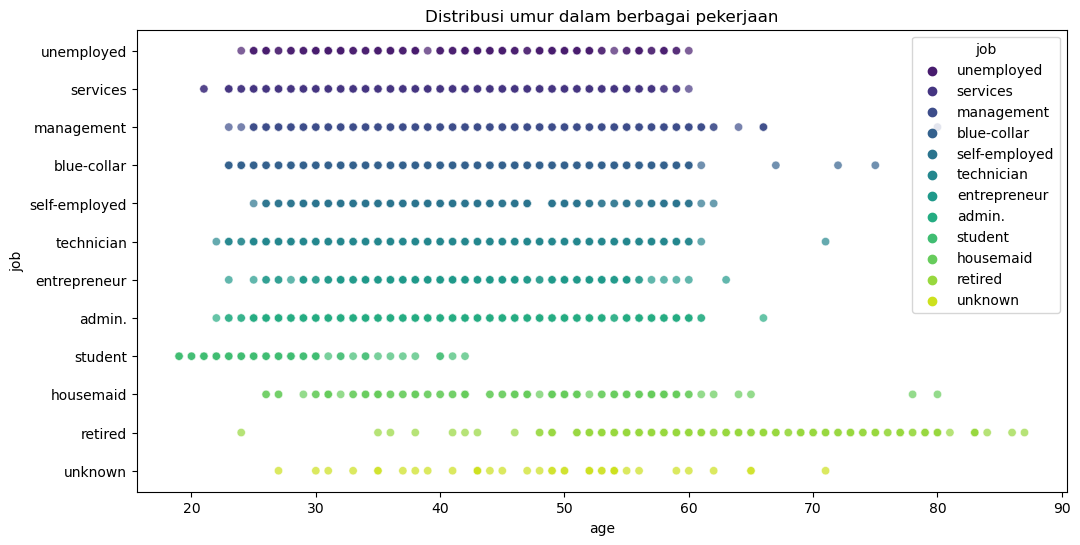

In [29]:
# visualisasi menggunakan scatter umur dari berbagai pekerjaan
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='age', y='job', hue='job', palette='viridis', alpha=0.7)
plt.xlabel('age')
plt.ylabel('job')
plt.title('Distribusi umur dalam berbagai pekerjaan')
plt.show()

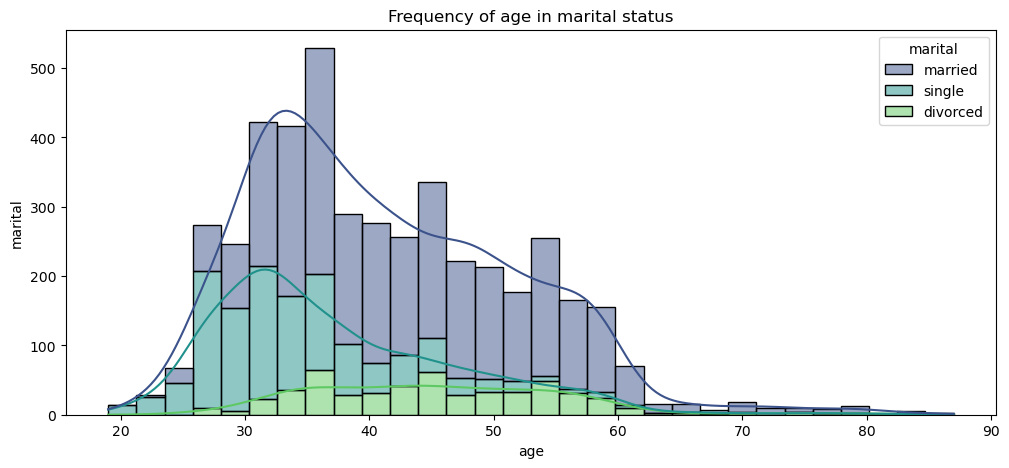

In [30]:
# visual histogram frekuensi usia dalam status perkawinan
plt.figure(figsize=(12,5))
sns.histplot(data = df, x='age', hue='marital', multiple='stack', bins=30, kde=True, palette='viridis')
plt.xlabel('age')
plt.ylabel('marital')
plt.title('Frequency of age in marital status')
plt.show()

Usia rata rata yang menikah paling tinggi ada pada di usia 30th keatas.
Sedangkan yang bercerai dimulai pada usia 25th sampai dengan 60th.

### DATA PREPROCESSING

In [31]:
LabelEncoder = preprocessing.LabelEncoder()

category = df.select_dtypes(include='object')
encode_df = df.copy()

for column in category.columns :
    encode_df[column] = LabelEncoder.fit_transform(df[column])

In [32]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int32
 3   education  4521 non-null   int32
 4   default    4521 non-null   int32
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int32
 7   loan       4521 non-null   int32
 8   contact    4521 non-null   int32
 9   day        4521 non-null   int64
 10  month      4521 non-null   int32
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int32
 16  y          4521 non-null   int32
dtypes: int32(10), int64(7)
memory usage: 424.0 KB


In [35]:
encode_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [36]:
#Standardization

scaler = preprocessing.StandardScaler()
scale_data = encode_df.copy()
numeric_data = df.select_dtypes(include=['int64','float64'])

for column in numeric_data.columns:
  scale_data[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

In [37]:
scale_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056270,10,1,0,0,0.121072,0,0,0,0.374052,10,-0.711861,-0.576829,-0.407218,-0.320413,3,0
1,-0.772583,7,1,1,0,1.118644,1,1,0,-0.596026,8,-0.169194,-0.576829,2.989044,2.041734,0,0
2,-0.583458,4,2,2,0,-0.024144,1,0,0,0.010273,0,-0.303898,-0.576829,2.899143,0.270124,0,0
3,-1.056270,4,1,2,0,0.017726,1,1,2,-1.566105,6,-0.250017,0.387967,-0.407218,-0.320413,3,0
4,1.686036,1,1,1,0,-0.472753,1,0,2,-1.323585,8,-0.146102,-0.576829,-0.407218,-0.320413,3,0


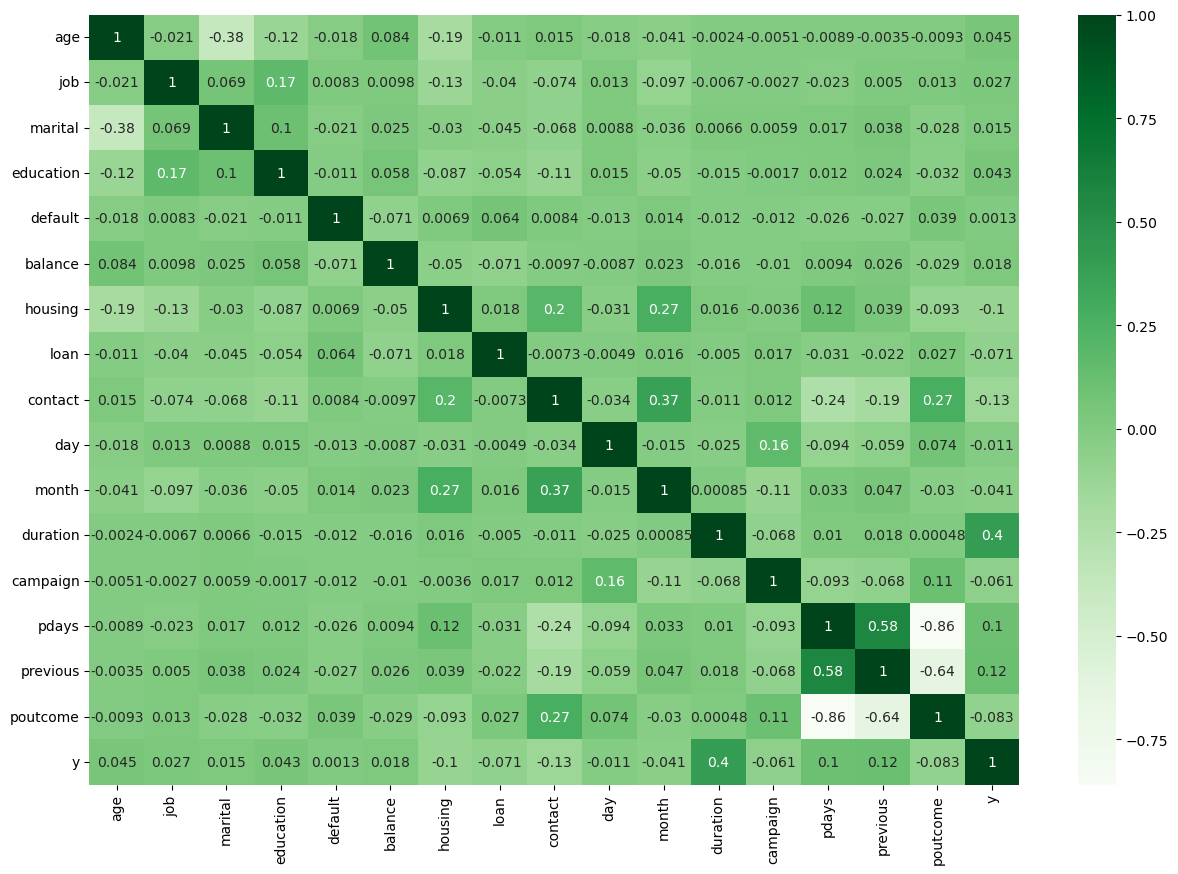

In [38]:
# untuk melihat apakah ada data korelasi atau tidak antar variabel
plt.figure(figsize=(15, 10))
ax = sns.heatmap(scale_data.corr(), annot=True, cmap='Greens')

In [40]:
scale_data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


In [46]:
scale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   int32  
 2   marital    4521 non-null   int32  
 3   education  4521 non-null   int32  
 4   default    4521 non-null   int32  
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   int32  
 7   loan       4521 non-null   int32  
 8   contact    4521 non-null   int32  
 9   day        4521 non-null   float64
 10  month      4521 non-null   int32  
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   int32  
 16  y          4521 non-null   int32  
dtypes: float64(7), int32(10)
memory usage: 424.0 KB


## Modelling

In [47]:
X = scale_data.drop(columns=['y'])
y = scale_data.y
split_test_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_test_size, random_state=13)

In [48]:
print('{0:0.2f}% ada pada training set'.format((len(X_train)/len(df.index)) * 100.0))
print('{0:0.2f}% ada pada test set'.format((len(X_test)/len(df.index)) * 100.0))

69.98% ada pada training set
30.02% ada pada test set


## LOGISTIC REGRESSION

In [49]:
modelLR= LogisticRegression()

In [50]:
modelLR.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_predLR = modelLR.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_predLR)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [53]:
conf_matrix = confusion_matrix(y_test, y_predLR)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1173   20]
 [ 133   31]]


In [54]:
classification_rep = classification_report(y_test, y_predLR)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1193
           1       0.61      0.19      0.29       164

    accuracy                           0.89      1357
   macro avg       0.75      0.59      0.61      1357
weighted avg       0.86      0.89      0.86      1357



## KNN

In [55]:
k = 5
modelKNN = KNeighborsClassifier(n_neighbors=k)
modelKNN.fit(X_train, y_train)


KNeighborsClassifier()

In [56]:
y_predKNN = modelKNN.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_predKNN)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [58]:
conf_matrix = confusion_matrix(y_test, y_predKNN)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1183   10]
 [ 136   28]]


In [59]:
classification_rep = classification_report(y_test, y_predKNN)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1193
           1       0.74      0.17      0.28       164

    accuracy                           0.89      1357
   macro avg       0.82      0.58      0.61      1357
weighted avg       0.88      0.89      0.86      1357



## SVM 

In [60]:
modelSVM= SVC(kernel = 'linear', C=2.0)
modelSVM.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

In [61]:
y_predSVM = modelSVM.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_predSVM)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [63]:
conf_matrix = confusion_matrix(y_test, y_predSVM)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1193    0]
 [ 164    0]]


In [64]:
classification_rep = classification_report(y_test, y_predSVM)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1193
           1       0.00      0.00      0.00       164

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.77      0.88      0.82      1357



C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## Naive Bayes

In [65]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

GaussianNB()

In [66]:
y_predNB = modelNB.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_predNB)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [68]:
conf_matrix = confusion_matrix(y_test, y_predNB)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[1042  151]
 [  93   71]]


In [69]:
classification_rep = classification_report(y_test, y_predNB)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1193
           1       0.32      0.43      0.37       164

    accuracy                           0.82      1357
   macro avg       0.62      0.65      0.63      1357
weighted avg       0.85      0.82      0.83      1357



## Decision Tree

In [70]:
modelDT= DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
y_predDT = modelDT.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_predDT)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [73]:
conf_matrix = confusion_matrix(y_test, y_predDT)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1123   70]
 [  91   73]]


In [74]:
classification_rep = classification_report(y_test, y_predDT)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1193
           1       0.51      0.45      0.48       164

    accuracy                           0.88      1357
   macro avg       0.72      0.69      0.70      1357
weighted avg       0.87      0.88      0.88      1357



## Random Forest

In [76]:
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelRF.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [77]:
y_predRF = modelRF.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_predRF)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [79]:
conf_matrix = confusion_matrix(y_test, y_predRF)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1166   27]
 [ 123   41]]


In [80]:
classification_rep = classification_report(y_test, y_predRF)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1193
           1       0.60      0.25      0.35       164

    accuracy                           0.89      1357
   macro avg       0.75      0.61      0.65      1357
weighted avg       0.87      0.89      0.87      1357

